# Purpose:

# 1) load encoded datasets

In [1]:
# Initial imports.
%run s0_fifa_players_functions.ipynb

from pathlib import Path
import os

## ---> Modify the location below to fit your dev environment

In [2]:
os.chdir('E:\\data-engineering@ColumbiaUnv\\Module-20_final_project\\resources')

!curl -L https://raw.githubusercontent.com/ponda614/Data-Science-Final-Project-/main/resources/players.csv  -o fifa_players_git.csv

os.chdir('E:\\data-engineering@ColumbiaUnv\\Module-20_final_project\\notebooks')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 3879k  100 3879k    0     0  5799k      0 --:--:-- --:--:-- --:--:-- 5799k


# 2) build dataframes

In [3]:
players_dataset_loc= os.path.join('../resources', 'fifa_players_encoded.csv')
players_df = create_fifa_players_dataframe(players_dataset_loc)

# display(players_df)

# 3) Separate features from target

In [4]:
# goalkeepers_stats_df = encode_field(goalkeepers_stats_df, 'rating')
# goal_keepers_dataset_loc= os.path.join('../resources', 'fifa_goal_keepers_encoded.csv')
# goalkeepers_stats_df.to_csv(goal_keepers_dataset_loc, index=False)
# display(goalkeepers_stats_df)
X = players_df.copy()
X = X.drop(["rating"], axis=1)

Y = players_df['rating'].values

# display(array)
# # display(goalkeepers_stats_df)
# display(Y)
# display(X)

# 4) Splitting into Train and Test sets.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)
# y_train = y.train.ravel()
# display(X_train)
# display(X_test)
# display(y_train)
# display(y_test)

In [6]:
from sklearn.preprocessing import StandardScaler

# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
# display(y_train)
# display(X_train_scaled)
# display(X_test_scaled)

# 5) Identify the learning rate that yields the best performance

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
   classifier = GradientBoostingClassifier(n_estimators=40,
   learning_rate=learning_rate,
   max_features=29,
   max_depth=30,
   random_state=10)
   classifier.fit(X_train_scaled, y_train)

display(classifier)

GradientBoostingClassifier(learning_rate=1, max_depth=30, max_features=29,
                           n_estimators=40, random_state=10)

# Making predictions using the Test Data

In [49]:
print("Learning rate: ", learning_rate)
print("Accuracy score (training): {0:.3f}".format(
       classifier.score(
           X_train_scaled,
           y_train)))
print("Accuracy score (validation): {0:.3f}".format(
       classifier.score(
           X_test_scaled,
           y_test)))

Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.824


# Evaluate the Model and Calculate the accuracy score

In [45]:
classifier = GradientBoostingClassifier(n_estimators=20,
   learning_rate=0.5, max_features=5, max_depth=3, random_state=0)

classifier.fit(X_train_scaled, y_train)
predictions = classifier.predict(X_test_scaled)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.8782420749279539


# Generate confusion matrix

In [46]:
import pandas 
cm = confusion_matrix(y_test, predictions)
cm_df = pandas.DataFrame(
   cm, index=["Actual 0", "Actual 1", "Actual 2"],
   columns=["Predicted 0", "Predicted 1", "Predicted 2"]
)
display(cm_df)

,Predicted 0,Predicted 1,Predicted 2
Actual 0,2483,0,166
Actual 1,2,15,13
Actual 2,304,22,1159


# Create Classification report

In [47]:
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      2649
           1       0.41      0.50      0.45        30
           2       0.87      0.78      0.82      1485

    accuracy                           0.88      4164
   macro avg       0.72      0.74      0.73      4164
weighted avg       0.88      0.88      0.88      4164



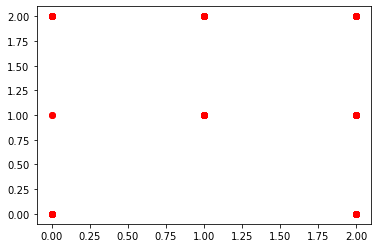

In [50]:
import matplotlib.pyplot as plt
plt.scatter(predictions, y_test, c='r')
plt.show()